# Stress Diagnosis Graph Verification

This notebook matches the coefficient tuning process for the Organizational Stress Diagnosis health risk calculation.
Adjust the coefficients in the code below to match the reference headers.

In [18]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import math

# Korean Font Setup for Windows
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [19]:
def calculate_risk(val1, val2, mean1, mean2, coef1, coef2):
    term = (val1 - mean1) * coef1 + (val2 - mean2) * coef2
    return 100 * math.exp(term)

def plot_stress_diagram(A, B, alpha, beta, C, D, gamma, delta):
    # Figure setup
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    
    # Define Colors and Levels for Fill
    # ~100: No Color (White/Transparent)
    # 100~120: Light Yellow (#FFFFCC)
    # 120~140: Yellow (#FFFF00)
    # 140~160: Light Orange (#FFCC99)
    # 160~180: Orange (#FF9900)
    # 180~: Red (#FF0000)
    fill_levels = [100, 120, 140, 160, 180, 500]
    fill_colors = ['#FFFFCC', '#FFFF00', '#FFCC99', '#FF9900', '#FF0000']
    cmap = mcolors.ListedColormap(fill_colors)
    norm = mcolors.BoundaryNorm(fill_levels, cmap.N)
    
    # Line Levels
    line_levels = [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]

    # ---------------------------------------------------------
    # Graph 1: Quantitative Burden (X) vs Control (Y)
    # ---------------------------------------------------------
    
    # Grid
    x = np.linspace(5, 12, 100)
    y = np.linspace(4, 11, 100)
    X, Y = np.meshgrid(x, y)
    
    # Calculate Risk Z
    Z = 100 * np.exp((X - A) * alpha + (Y - B) * beta)
    
    # Color Fill
    cf = ax1.contourf(X, Y, Z, levels=fill_levels, cmap=cmap, norm=norm, alpha=0.6, extend='max')
    
    # Contour Lines
    CS = ax1.contour(X, Y, Z, levels=line_levels, colors='k', linewidths=1)
    ax1.clabel(CS, inline=True, fontsize=10, fmt='%d')
    
    ax1.set_title('업무 스트레스 판정도 (업무 부담 vs 자율성)')
    ax1.set_xlabel('업무의 양적 부담 (A1+A2+A3)')
    ax1.set_ylabel('업무의 자율성 (A8+A9+A10)')
    ax1.grid(True)
    
    # ---------------------------------------------------------
    # Graph 2: Supervisor Support (X) vs Coworker Support (Y)
    # ---------------------------------------------------------
    
    x2 = np.linspace(4, 10, 100)
    y2 = np.linspace(5, 11, 100)
    X2, Y2 = np.meshgrid(x2, y2)
    
    # Risk Calculation
    Z2 = 100 * np.exp((X2 - C) * gamma + (Y2 - D) * delta)
    
    # Color Fill
    cf2 = ax2.contourf(X2, Y2, Z2, levels=fill_levels, cmap=cmap, norm=norm, alpha=0.6, extend='max')
    
    # Contour Lines
    CS2 = ax2.contour(X2, Y2, Z2, levels=line_levels, colors='k', linewidths=1)
    ax2.clabel(CS2, inline=True, fontsize=10, fmt='%d')
    
    ax2.set_title('주변 지지 판정도 (상사 지원 vs 동료 지원)')
    ax2.set_xlabel('상사의 지원 (C1+C4+C7)')
    ax2.set_ylabel('동료의 지원 (C2+C5+C8)')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

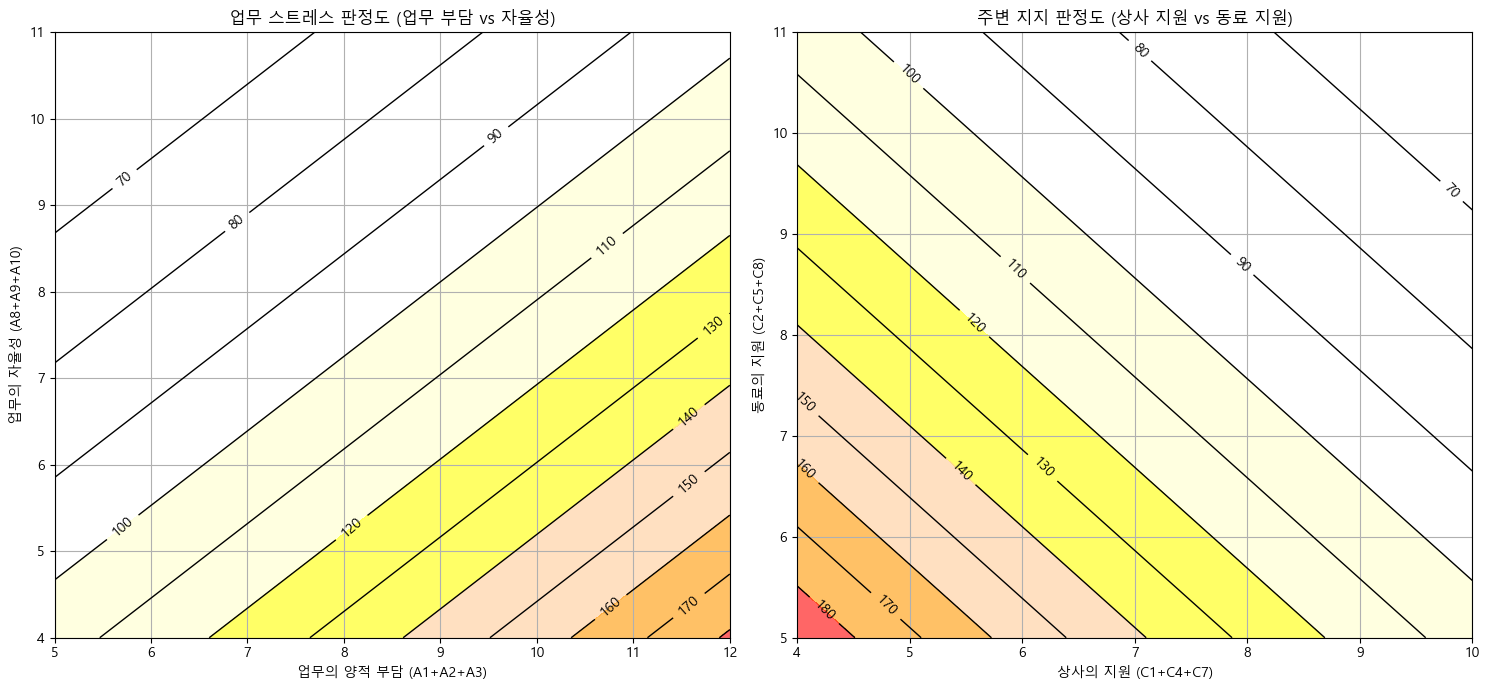

In [20]:
# Solved Parameters based on provided contour points

# Job Demand-Control
A = 8.2500   # Burden Mean
B = 7.4688   # Control Mean
alpha = 0.07668 # Burden Coeff
beta = -0.08896 # Control Coeff

# Social Support
C = 7.3000   # Supervisor Mean
D = 8.2668   # Coworker Mean
gamma = -0.09711 # Supervisor Coeff
delta = -0.09711 # Coworker Coeff

plot_stress_diagram(A, B, alpha, beta, C, D, gamma, delta)